In [1]:
import pandas as pd
a=pd.read_excel('C:\\Users\HP\OneDrive\Desktop\zk project\eCommerce Store.xlsx')
print(a)

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_19612\3775312437.py:2: SyntaxWarning: invalid escape sequence '\H'
  a=pd.read_excel('C:\\Users\HP\OneDrive\Desktop\zk project\eCommerce Store.xlsx')


       index             Order ID  Cust ID Gender  Age       Date     Status  \
0          1  171-1029312-3038738  1029312  Women   44 2022-12-04  Delivered   
1          2  405-2183842-2225946  2183842  Women   29 2022-12-04  Delivered   
2          3  171-1641533-8921966  1641533  Women   67 2022-12-04  Delivered   
3          4  404-7490807-6300351  7490807  Women   20 2022-12-04  Delivered   
4          5  403-9293516-4577154  9293516  Women   62 2022-12-04  Delivered   
...      ...                  ...      ...    ...  ...        ...        ...   
31042  31043  405-4724097-1016369  4724097    Men   60 2022-01-06  Delivered   
31043  31044  405-4724097-1016369  4724097    Men   34 2022-01-06  Delivered   
31044  31045  408-3572295-5992330  3572295    Men   29 2022-01-06  Delivered   
31045  31046  405-1423498-9705162  1423498    Men   46 2022-01-06  Delivered   
31046  31047  408-4694875-8249153  4694875    Men   36 2022-01-06  Delivered   

       Channel                       SK

In [3]:
print(a.to_string())

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
#check for duplicates
a.duplicated().sum()

In [5]:
#check for null values
a.isnull().sum()

index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64

In [ ]:
#drop null
a = a.dropna()

In [ ]:
print(a)

In [7]:
a.describe()

,index,Cust ID,Age,Date,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,2022-06-15 06:41:39.719779584,682.074822,460474.587206
min,1.00000,8.950000e+02,18.000000,2022-01-04 00:00:00,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,2022-03-06 00:00:00,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,2022-06-06 00:00:00,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,2022-09-06 00:00:00,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,2022-12-06 00:00:00,3036.000000,855117.000000
std,8962.64124,2.900678e+06,15.117233,NaN,268.582173,198116.733009


In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Gender            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Date              31047 non-null  datetime64[ns]
 6   Status            31047 non-null  object        
 7   Channel           31047 non-null  object        
 8   SKU               31047 non-null  object        
 9   Category          31047 non-null  object        
 10  Size              31047 non-null  object        
 11  Qty               31047 non-null  object        
 12  currency          31047 non-null  object        
 13  Amount            31047 non-null  int64         
 14  ship-city         3104

In [11]:
print("\nGender Data")
print(a['Gender'].value_counts())


Gender Data
Gender
Women    21553
Men       9494
Name: count, dtype: int64


In [13]:
#calculate average amount
average_amount=a['Amount'].mean()
print(f'Average amount:Rs.{average_amount:.2f}')

Average amount:Rs.682.07


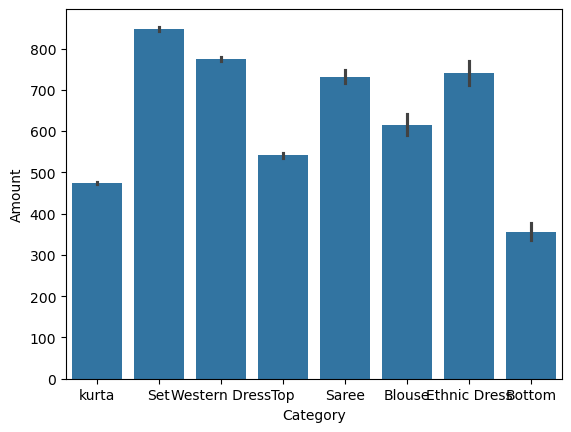

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Category', y='Amount',data=a)
plt.show()

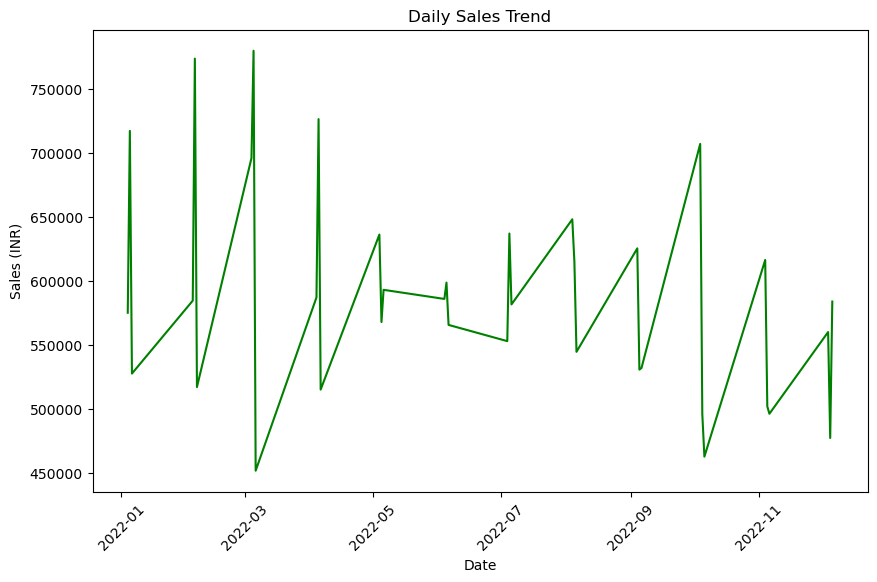

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Convert Date to datetime format
a['Date'] = pd.to_datetime(a['Date'])
# Group by date to get daily sales
daily_sales = a.groupby('Date')['Amount'].sum().reset_index()
# Plotting the sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Amount', data=daily_sales,color='green')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales (INR)')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19612\615351643.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x='Category', data=a,hue='Gender', order=a['Category'].value_counts().index,color="skyblue")


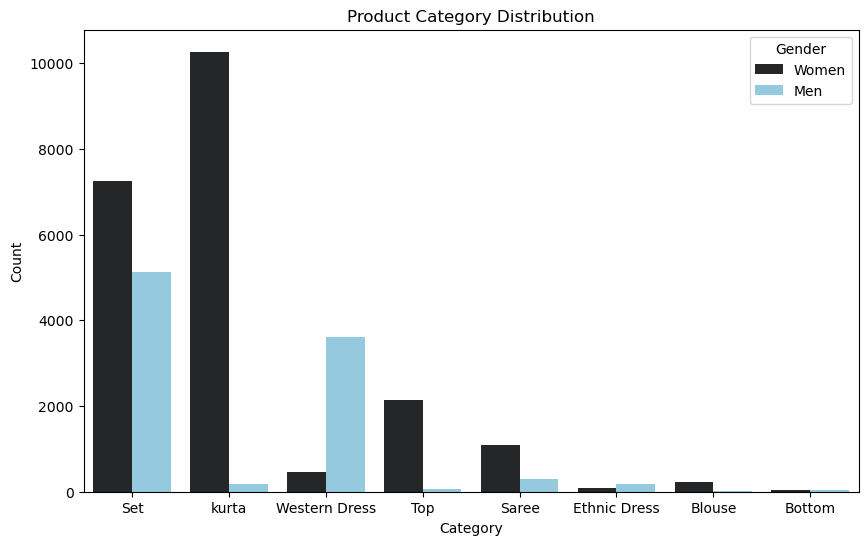

In [25]:
# distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=a,hue='Gender', order=a['Category'].value_counts().index,color="skyblue")
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


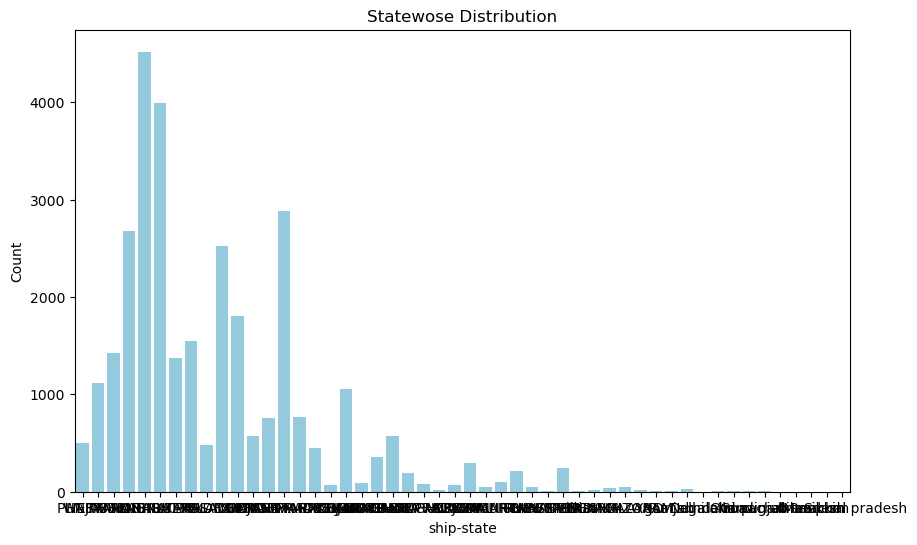

In [31]:
#gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='ship-state', data=a,color='skyblue')
plt.title('Statewose Distribution')
plt.xlabel('ship-state')
plt.ylabel('Count')
rotation
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=a,hue='Status', order=a['Category'].value_counts().index,color="skyblue")
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()